In [48]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [49]:
df = pd.read_csv('Data_Tanaman_Padi_Sumatera.csv')
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [54]:
df.nunique()

Provinsi            8
Tahun              28
Produksi          224
Luas Panen        224
Curah hujan       220
Kelembapan        180
Suhu rata-rata    136
dtype: int64

In [55]:
kategorikal = df.select_dtypes(include='object').columns
kategorikal

Index(['Provinsi'], dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in kategorikal:
  df[i] = le.fit_transform(df[i])

In [57]:
# Melakukan analisa deskriptif
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Provinsi,224.0,3.500000e+00,2.296420e+00,0.00,1.7500,3.500,5.25,7.00
Tahun,224.0,2.006500e+03,8.095838e+00,1993.00,1999.7500,2006.500,2013.25,2020.00
Produksi,224.0,1.679701e+06,1.161387e+06,42938.00,548857.0000,1667773.000,2436850.75,4881089.00
Luas Panen,224.0,3.743500e+05,2.327512e+05,63142.04,146919.5000,373551.500,514570.25,872737.00
Curah hujan,224.0,2.452491e+03,1.031973e+03,222.50,1703.5250,2315.700,3039.70,5522.00
Kelembapan,224.0,8.094871e+01,4.878680e+00,54.20,78.9750,82.375,84.00,90.60
Suhu rata-rata,224.0,2.680196e+01,1.197041e+00,22.19,26.1775,26.730,27.20,29.85


In [60]:
# Check missing value
df.isna().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [63]:
# Cek duplicate
duplicate = df[df.duplicated()].sum()
duplicate

Provinsi          0.0
Tahun             0.0
Produksi          0.0
Luas Panen        0.0
Curah hujan       0.0
Kelembapan        0.0
Suhu rata-rata    0.0
dtype: float64

In [64]:
# Cek ukuran data apakah duplicate sudah terhapus
df.shape

(224, 7)

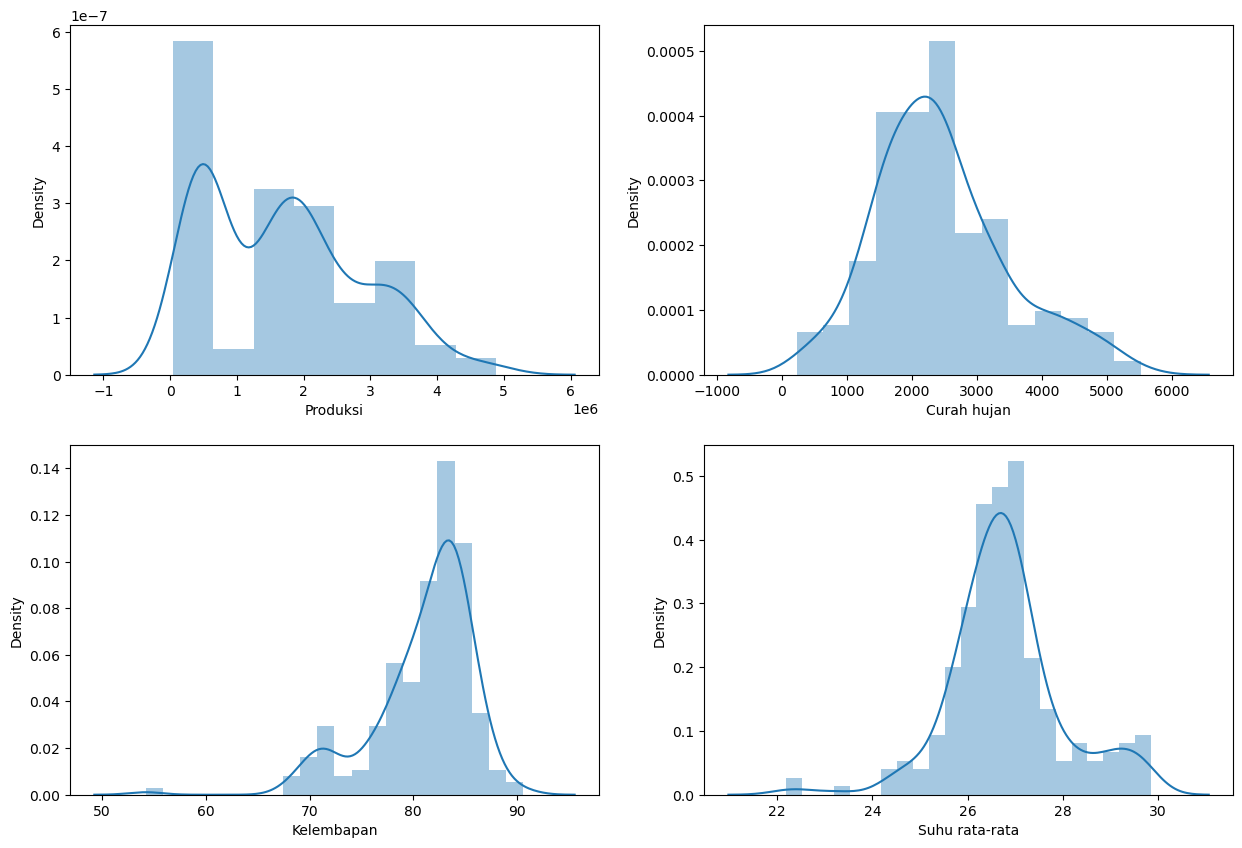

In [67]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(df["Produksi"], ax=axes[0, 0])
sns.distplot(df["Curah hujan"], ax=axes[0, 1])
sns.distplot(df["Kelembapan"], ax=axes[1, 0])
sns.distplot(df["Suhu rata-rata"], ax=axes[1, 1])
plt.show()

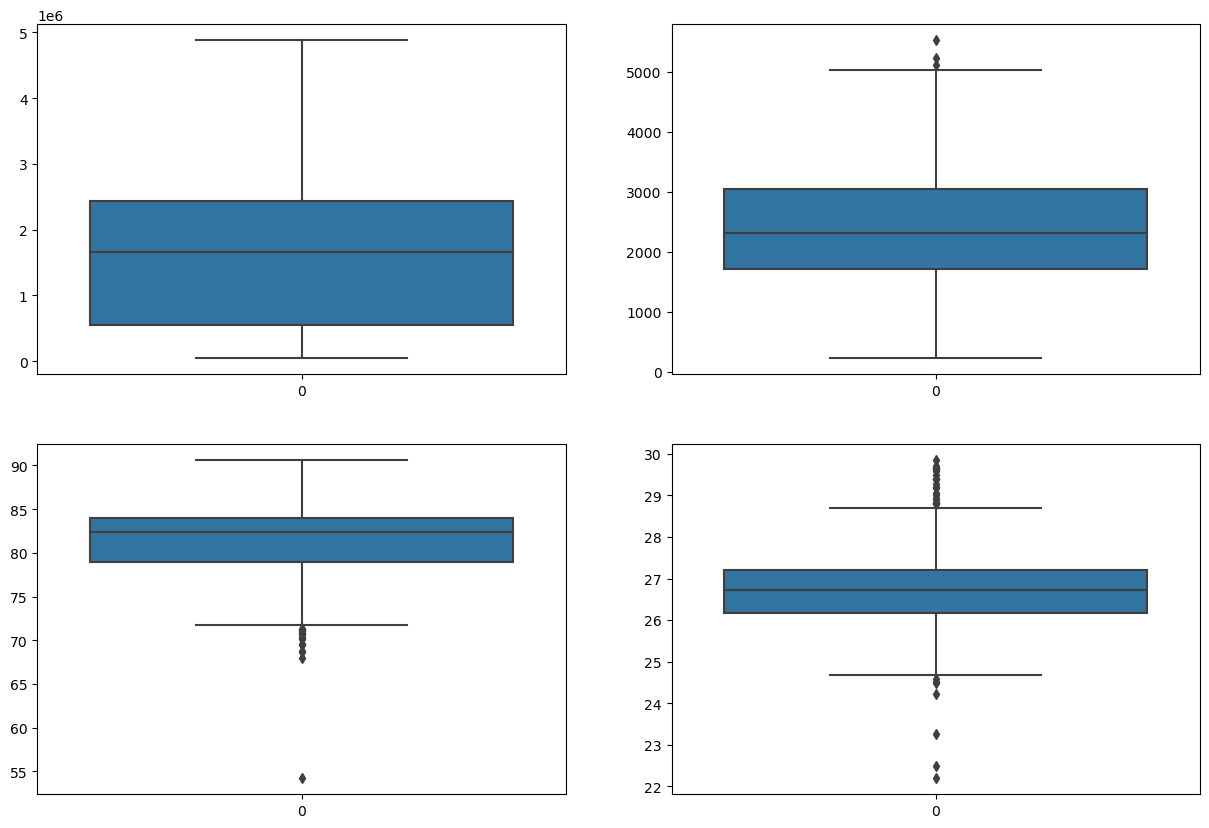

In [69]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(df["Produksi"], ax=axes[0, 0])
sns.boxplot(df["Curah hujan"], ax=axes[0, 1])
sns.boxplot(df["Kelembapan"], ax=axes[1, 0])
sns.boxplot(df["Suhu rata-rata"], ax=axes[1, 1])
plt.show()

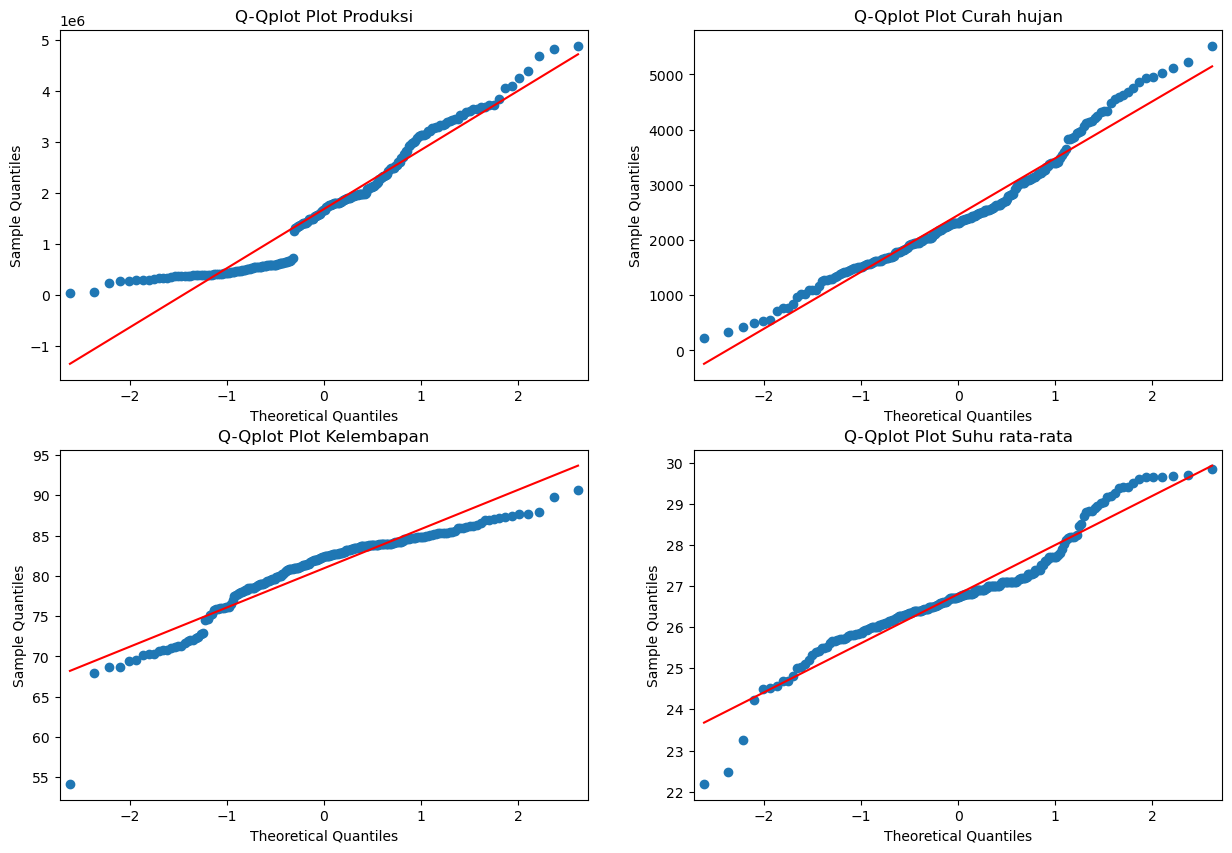

In [70]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(df["Produksi"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot Produksi')

sm.graphics.qqplot(df["Curah hujan"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot Curah hujan')

sm.graphics.qqplot(df["Kelembapan"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot Kelembapan')

sm.graphics.qqplot(df["Suhu rata-rata"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot Suhu rata-rata')

plt.show()

In [71]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = df.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.925, p=0.000
Tolak H0, Provinsi tidak berdistribusi normal
Statistics=0.952, p=0.000
Tolak H0, Tahun tidak berdistribusi normal
Statistics=0.920, p=0.000
Tolak H0, Produksi tidak berdistribusi normal
Statistics=0.919, p=0.000
Tolak H0, Luas Panen tidak berdistribusi normal
Statistics=0.967, p=0.000
Tolak H0, Curah hujan tidak berdistribusi normal
Statistics=0.888, p=0.000
Tolak H0, Kelembapan tidak berdistribusi normal
Statistics=0.942, p=0.000
Tolak H0, Suhu rata-rata tidak berdistribusi normal


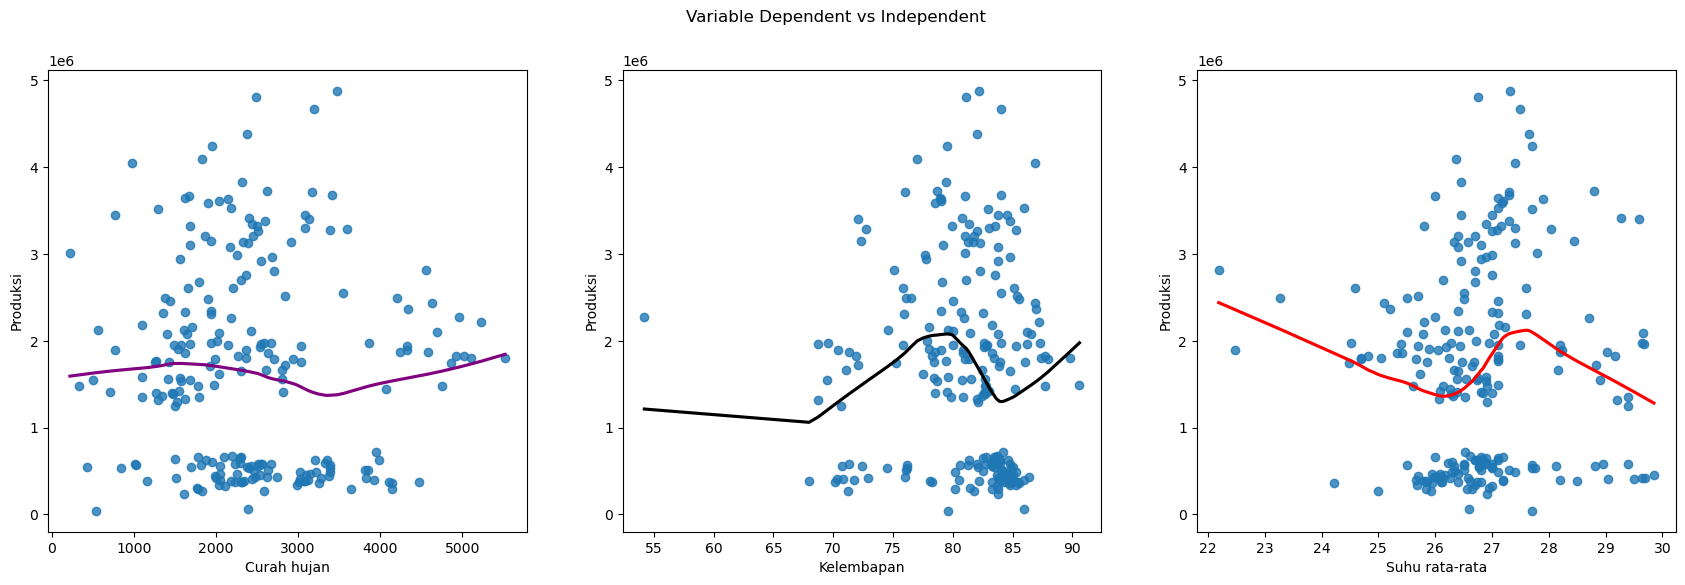

In [94]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["Curah hujan"], y=df["Produksi"], lowess=True, line_kws={'color': 'purple'}, ax=axes[0])
sns.regplot(x=df["Kelembapan"], y=df["Produksi"], lowess=True, line_kws={'color': 'black'}, ax=axes[1])
sns.regplot(x=df["Suhu rata-rata"], y=df["Produksi"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
plt.show()

<Axes: >

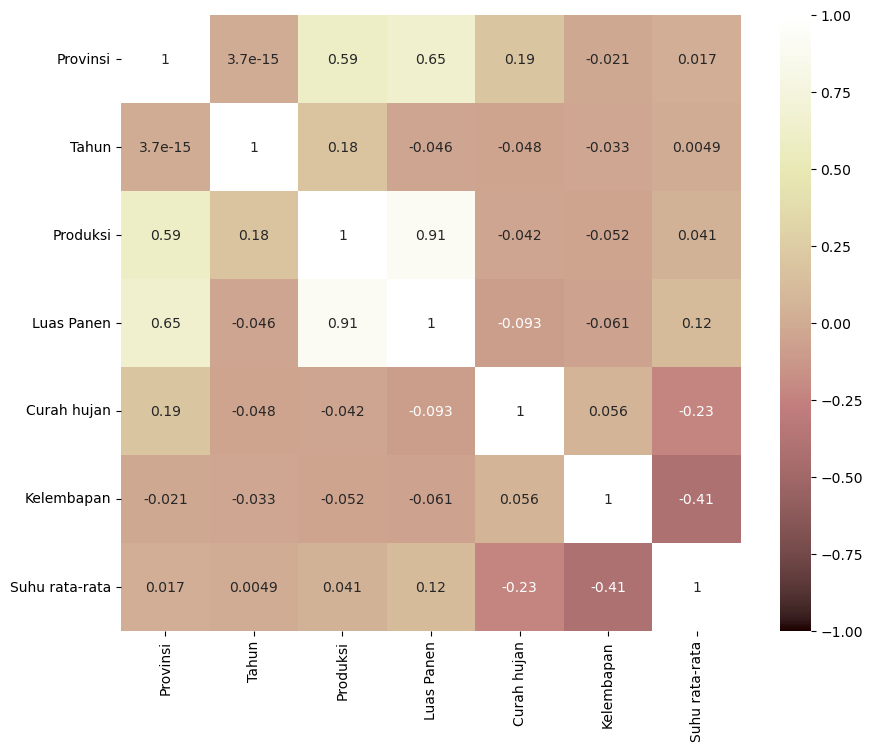

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), vmax=1, vmin=-1, center=0, cmap="pink", annot=True)

In [74]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Produksi"].sort_values()
korelasi

Kelembapan       -0.052316
Curah hujan      -0.042129
Suhu rata-rata    0.041160
Tahun             0.182527
Provinsi          0.594993
Luas Panen        0.905622
Produksi          1.000000
Name: Produksi, dtype: float64

In [95]:
# Scale data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(include=['number']))
scaled_df

array([[-1.52752523, -1.67125804, -0.30218094, ..., -0.80170689,
         0.21597014, -0.62122014],
       [-1.52752523, -1.54746115, -0.3279293 , ..., -0.90465284,
         0.24062205,  0.09882708],
       [-1.52752523, -1.42366426, -0.25612522, ..., -0.94835631,
         0.36388158, -0.44539465],
       ...,
       [-0.21821789,  1.42366426,  0.69808986, ..., -1.03595749,
        -1.00635353, -1.09008809],
       [-0.21821789,  1.54746115,  0.41801151, ..., -0.72459455,
        -0.59959708,  0.35837898],
       [-0.21821789,  1.67125804,  0.79842829, ..., -0.23424162,
        -1.05771167, -1.86037116]])

In [77]:
# Membuat dataframe dari hasil scalling
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,-1.527525,-1.671258,-0.302181,-0.218580,-0.801707,0.215970,-0.621220
1,-1.527525,-1.547461,-0.327929,-0.195103,-0.904653,0.240622,0.098827
2,-1.527525,-1.423664,-0.256125,-0.151130,-0.948356,0.363882,-0.445395
3,-1.527525,-1.299867,-0.224866,-0.112504,-0.869690,0.421403,-0.604475
4,-1.527525,-1.176070,-0.268924,-0.158415,-1.081409,0.310469,-0.411904
...,...,...,...,...,...,...,...
219,-0.218218,1.176070,1.857298,0.070830,-0.131004,-0.318154,-0.294687
220,-0.218218,1.299867,2.080574,0.095633,-0.609315,-0.802975,-0.370041
221,-0.218218,1.423664,0.698090,0.592474,-1.035957,-1.006354,-1.090088
222,-0.218218,1.547461,0.418012,0.386483,-0.724595,-0.599597,0.358379


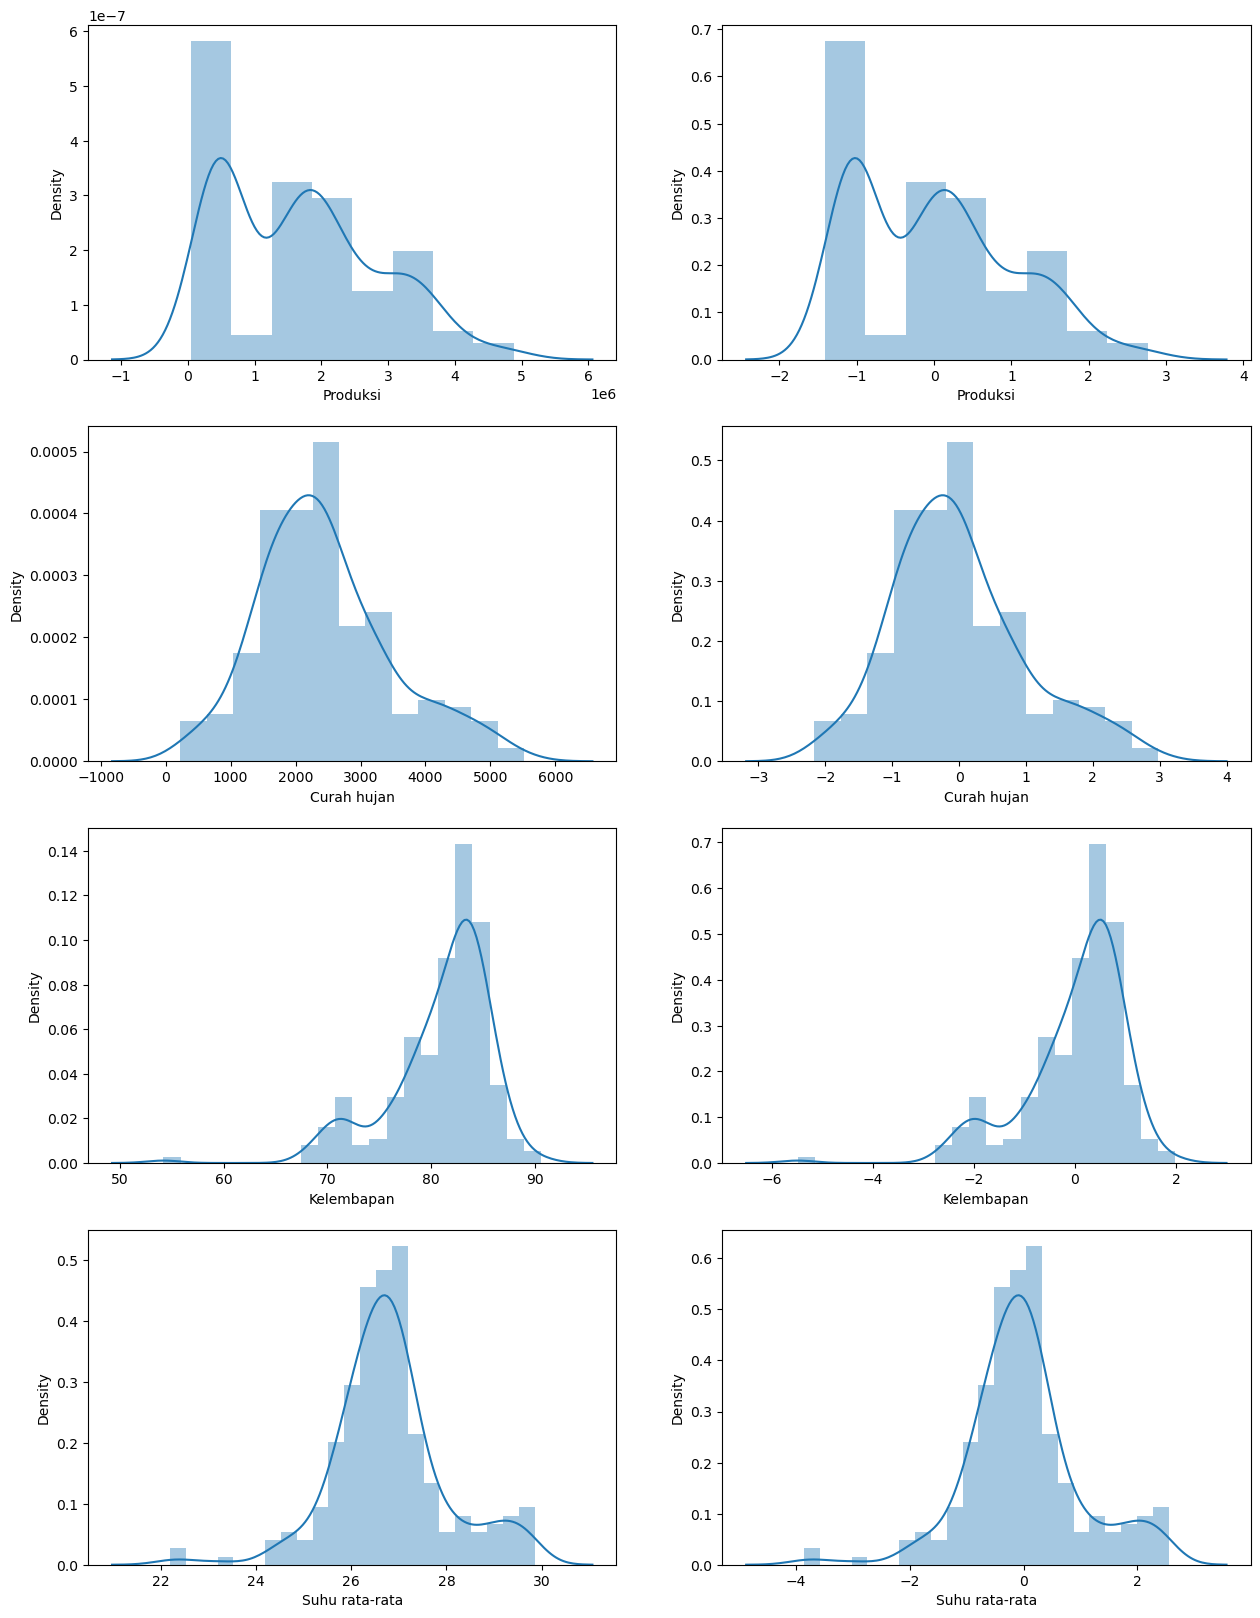

In [78]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

sns.distplot(df["Produksi"], ax=axes[0, 0])
sns.distplot(scaled_df["Produksi"], ax=axes[0, 1])
sns.distplot(df["Curah hujan"], ax=axes[1, 0])
sns.distplot(scaled_df["Curah hujan"], ax=axes[1, 1])
sns.distplot(df["Kelembapan"], ax=axes[2, 0])
sns.distplot(scaled_df["Kelembapan"], ax=axes[2, 1])
sns.distplot(df["Suhu rata-rata"], ax=axes[3, 0])
sns.distplot(scaled_df["Suhu rata-rata"], ax=axes[3, 1])
plt.show()

In [101]:
x = df.drop(columns='Produksi')
y=df['Produksi']

In [103]:
Ir=LinearRegression()
Ir.fit(x,y)

LinearRegression()

In [104]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [105]:
Ir=LinearRegression()
Ir.fit(x,y)
y_hat=Ir.predict(x)
print('MSE:', mean_squared_error(y,y_hat))
print('R-square:',r2_score(y,y_hat))

MSE: 165213147674.03778
R-square: 0.8769636198656465


In [115]:
x = scaled_df.drop("Produksi", axis=2).values
y = scaled_df['Produksi'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

print("Ukuran X train ", len(x_train))
print("Ukuran X test ", len(x_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [116]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

NameError: name 'X_train' is not defined